In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = 'C:/Users/Ishita/Downloads/Raw Data.csv' 
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip()

print("Columns in the dataset:", data.columns.tolist())

Columns in the dataset: ['1. Age', '2. Gender', '3. University', '4. Department', '5. Academic Year', '6. Current CGPA', '7. Did you receive a waiver or scholarship at your university?', '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?', '2. In a semester, how often have you been unable to stop worrying about your academic affairs?', '3. In a semester, how often have you had trouble relaxing due to academic pressure?', '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?', '5. In a semester, how often have you worried too much about academic affairs?', '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?', '7. In a semester, how often have you felt afraid, as if something awful might happen?', 'Anxiety Value', 'Anxiety Label', '1. In a semester, how often have you felt upset due to something that happened in your academic affairs?', '2. In 

In [113]:
columns = [
    '2. Gender',
    '5. Academic Year',
    '6. Current CGPA',
    'Anxiety Value',
    'Anxiety Label',
    'Stress Value',
    'Stress Label',
    'Depression Value',
    'Depression Label']

df2 = data[columns]

print(df2.head())

  2. Gender           5. Academic Year  6. Current CGPA  Anxiety Value  \
0    Female  Fourth Year or Equivalent                2             10   
1      Male   First Year or Equivalent                5              9   
2      Male   First Year or Equivalent                3             10   
3      Male   First Year or Equivalent                4              8   
4      Male   First Year or Equivalent                4              7   

      Anxiety Label  Stress Value     Stress Label  Depression Value  \
0  Moderate Anxiety            21  Moderate Stress                11   
1      Mild Anxiety            18  Moderate Stress                 9   
2  Moderate Anxiety            23  Moderate Stress                16   
3      Mild Anxiety            20  Moderate Stress                 9   
4      Mild Anxiety            20  Moderate Stress                 9   

               Depression Label  
0           Moderate Depression  
1               Mild Depression  
2  Moderately Severe

In [115]:
df2.describe()

,6. Current CGPA,Anxiety Value,Stress Value,Depression Value
count,1977.000000,1977.000000,1977.000000,1977.000000
mean,2.995448,12.290845,22.963075,14.374305
std,1.368929,5.496399,6.750405,6.659329
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.000000,19.000000,9.000000
50%,3.000000,13.000000,22.000000,14.000000
75%,4.000000,17.000000,27.000000,19.000000
max,5.000000,21.000000,40.000000,27.000000


In [117]:
unique_cgpa_values = df2['6. Current CGPA'].unique()
print("Unique CGPA values:", unique_cgpa_values)

Unique CGPA values: [2 5 3 4 1 0]


In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recompute the correlation matrix including the now numeric CGPA values
correlation_matrix = data[['6. Current CGPA', 'Anxiety Value', 'Stress Value', 'Depression Value']].corr()

# Print the correlation matrix
print(correlation_matrix)


                  6. Current CGPA  Anxiety Value  Stress Value  \
6. Current CGPA          1.000000      -0.019531     -0.077401   
Anxiety Value           -0.019531       1.000000      0.639773   
Stress Value            -0.077401       0.639773      1.000000   
Depression Value        -0.026071       0.767879      0.582931   

                  Depression Value  
6. Current CGPA          -0.026071  
Anxiety Value             0.767879  
Stress Value              0.582931  
Depression Value          1.000000  


In [121]:
from scipy.stats import pearsonr

# Correlation and p-value between CGPA and Anxiety
corr_anxiety, p_anxiety = pearsonr(data['6. Current CGPA'], data['Anxiety Value'])
print(f"Correlation between CGPA and Anxiety: {corr_anxiety}, P-value: {p_anxiety}")

# Correlation and p-value between CGPA and Stress
corr_stress, p_stress = pearsonr(data['6. Current CGPA'], data['Stress Value'])
print(f"Correlation between CGPA and Stress: {corr_stress}, P-value: {p_stress}")

# Correlation and p-value between CGPA and Depression
corr_depression, p_depression = pearsonr(data['6. Current CGPA'], data['Depression Value'])
print(f"Correlation between CGPA and Depression: {corr_depression}, P-value: {p_depression}")


Correlation between CGPA and Anxiety: -0.019530981779231404, P-value: 0.38542239657669625
Correlation between CGPA and Stress: -0.07740099377992841, P-value: 0.0005720992471685308
Correlation between CGPA and Depression: -0.02607105338950945, P-value: 0.24658940301113436


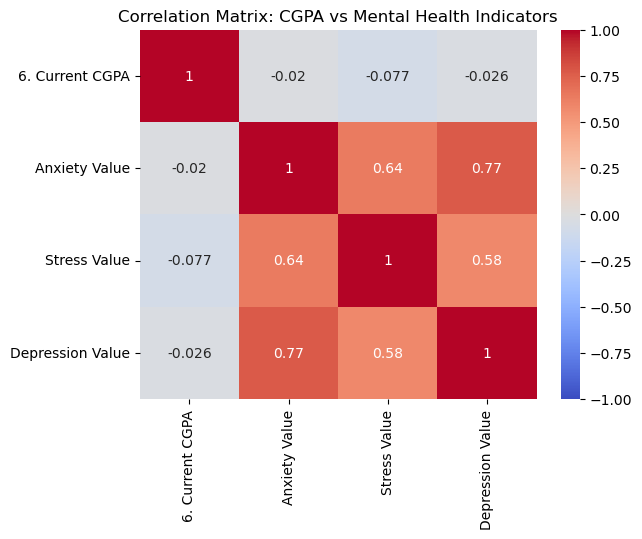

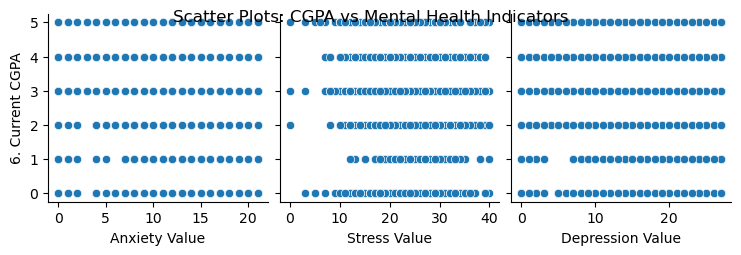

In [123]:
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix: CGPA vs Mental Health Indicators")
plt.show()

# Scatter plots to visualize the relationships
sns.pairplot(data, x_vars=['Anxiety Value', 'Stress Value', 'Depression Value'], y_vars='6. Current CGPA', kind='scatter')
plt.suptitle("Scatter Plots: CGPA vs Mental Health Indicators")
plt.show()


In [125]:
from sklearn.preprocessing import StandardScaler

# Select the columns to standardize
columns_to_standardize = ['6. Current CGPA', 'Anxiety Value', 'Stress Value', 'Depression Value']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Display the standardized data
print(data[columns_to_standardize].head())


   6. Current CGPA  Anxiety Value  Stress Value  Depression Value
0        -0.727356      -0.416896     -0.290882         -0.506832
1         1.464692      -0.598879     -0.735412         -0.807238
2         0.003326      -0.416896      0.005471          0.244185
3         0.734009      -0.780862     -0.439059         -0.807238
4         0.734009      -0.962845     -0.439059         -0.807238


                  6. Current CGPA  Anxiety Value  Stress Value  \
6. Current CGPA          1.000000      -0.019531     -0.077401   
Anxiety Value           -0.019531       1.000000      0.639773   
Stress Value            -0.077401       0.639773      1.000000   
Depression Value        -0.026071       0.767879      0.582931   

                  Depression Value  
6. Current CGPA          -0.026071  
Anxiety Value             0.767879  
Stress Value              0.582931  
Depression Value          1.000000  


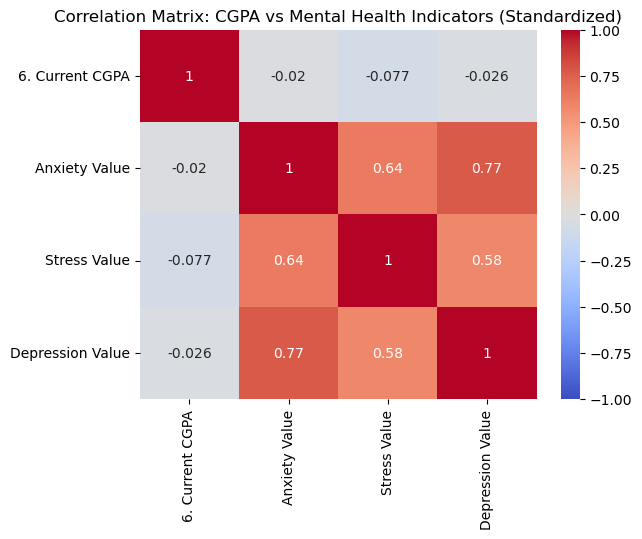

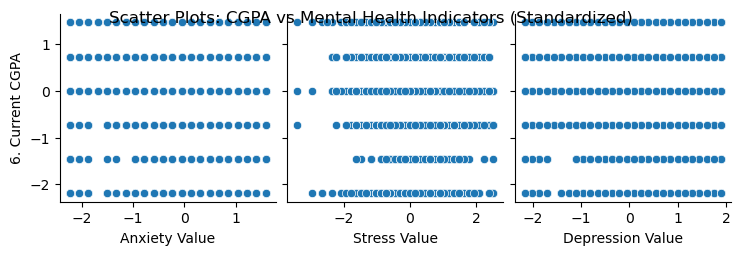

In [127]:
# Recompute the correlation matrix
correlation_matrix = data[['6. Current CGPA', 'Anxiety Value', 'Stress Value', 'Depression Value']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix: CGPA vs Mental Health Indicators (Standardized)")
plt.show()

# Scatter plots to visualize the relationships
sns.pairplot(data, x_vars=['Anxiety Value', 'Stress Value', 'Depression Value'], y_vars='6. Current CGPA', kind='scatter')
plt.suptitle("Scatter Plots: CGPA vs Mental Health Indicators (Standardized)")
plt.show()


In [129]:
from scipy.stats import pearsonr

# Correlation and p-value between CGPA and Anxiety
corr_anxiety, p_anxiety = pearsonr(data['6. Current CGPA'], data['Anxiety Value'])
print(f"Correlation between CGPA and Anxiety: {corr_anxiety}, P-value: {p_anxiety}")

# Correlation and p-value between CGPA and Stress
corr_stress, p_stress = pearsonr(data['6. Current CGPA'], data['Stress Value'])
print(f"Correlation between CGPA and Stress: {corr_stress}, P-value: {p_stress}")

# Correlation and p-value between CGPA and Depression
corr_depression, p_depression = pearsonr(data['6. Current CGPA'], data['Depression Value'])
print(f"Correlation between CGPA and Depression: {corr_depression}, P-value: {p_depression}")


Correlation between CGPA and Anxiety: -0.01953098177923142, P-value: 0.3854223965766928
Correlation between CGPA and Stress: -0.07740099377992841, P-value: 0.0005720992471685308
Correlation between CGPA and Depression: -0.026071053389509442, P-value: 0.24658940301113436
